In [1]:
#%load_ext autoreload
#%autoreload 2
import os
from multiprocessing import Pool
from itertools import islice
import anndata
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels as sms
#import pingouin as pg
from patsy import  dmatrices
import patsy
#import holoviews as hv
import time
import concurrent.futures as futures

#import diffxpy.api as de

#from batchglm.api.models.tf1.glm_nb import Simulator
#import scanpy as sc

In [2]:
from diffxpy.testing import lrt, wald, wald_repeated, t_test, rank_test, two_sample, pairwise, \
    versus_rest, partition, continuous_1d
import anndata

2021-09-29 07:52:15.411887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-29 07:52:15.411990: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
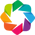

In [2]:
hv.notebook_extension('bokeh')

In [3]:
#sim = Simulator(num_observations=200, num_features=100)
#sim.generate_sample_description(num_batches=0, num_conditions=2)
#sim.generate_params(
#    rand_fn_loc=lambda shape: np.random.uniform(-0.1, 0.1, shape),
#    rand_fn_scale=lambda shape: np.random.uniform(0.1, 2, shape)
#)
#sim.generate_data()
#
#data = anndata.AnnData(
#    X=sim.x,
#    var=pd.DataFrame(index=["gene" + str(i) for i in range(sim.x.shape[1])]),
#    obs=sim.sample_description
#)

In [5]:
#test = de.test.wald(
#    data=data,
#    formula_loc="~ 1 + condition",
#    factor_loc_totest="condition"
#)

In [3]:
class EdgerObj:
    def __init__(self, rawcount, group):
        self.rawcount = rawcount
        self.group = group
    @property
    def normCount(self):
        rawcount = self.rawcount
        group = self.group
        sample_info = EdgerObj.egeList(rawcount, group)
        return rawcount/sample_info['scalingFactor']
    @property
    def SampleInfo(self):
        rawcount = self.rawcount
        group = self.group
        sample_info = EdgerObj.egeList(rawcount, group)
        return sample_info
    @property
    def cpm(self):
        rawcount = self.rawcount
        group = self.group
        info = EdgerObj.egeList(rawCount, group)
        edgrData = rawcount/info['scalingFactor']
        cpmData = edgrData/(info['lib.size']/1000000)
        return cpmData

    @staticmethod
    def egeList(rawcount, group):
        perc = lambda x,y : round((y/100) * x)
        sample_info = pd.DataFrame(index = rawcount.columns)
        rawcount = rawcount[(rawcount != 0).any(1)]
        sample_info['lib.size'] = rawcount.sum(0)
        rawcount_scl = rawcount/sample_info['lib.size']
        mean_quant = rawcount_scl.quantile([0.75]).mean(1)
        refcol = np.abs(rawcount_scl.quantile([0.75]).values - mean_quant.iloc[0]).argmin()
        nrmSamples = rawcount_scl.columns.to_list()
        nrmSamples.pop(refcol)
        refSamp = rawcount_scl.iloc[:, refcol].to_frame()
        geneNorm = np.log2(rawcount_scl.loc[:,nrmSamples]/refSamp.values)
        glist = np.array([geneNorm[~geneNorm[sample].isin([np.nan, np.inf, -np.inf])][sample].sort_values().index for sample in nrmSamples])
        glist_30perc = np.array([arr[perc(len(arr), 30) : -perc(len(arr), 30)] for arr in glist])
        geoMean = (np.log2(refSamp.values) + np.log2(rawcount_scl.loc[:, nrmSamples]))/2
        geoMnList = np.array([geoMean[~geoMean[sample].isin([np.nan, np.inf, -np.inf])][sample].sort_values().index for sample in nrmSamples])
        geoMnList_5perc = np.array([arr[perc(len(arr), 5) : -perc(len(arr), 5)] for arr in geoMnList])
        commonGenes = np.array([np.intersect1d(arr1, arr2) for arr1, arr2 in zip(glist_30perc, geoMnList_5perc)])
        scaling_factor =  [2**geneNorm.loc[commonGenes[i], nrmSamples[i]].mean() for i in range(len(nrmSamples))]
        scaling_factor.insert(refcol, 1)
        sample_info['scalingFactor'] = scaling_factor/stats.mstats.gmean(scaling_factor)
        sample_info['group'] = group
        return sample_info

    @staticmethod
    def edgerFilter(dataframe, threshold = 0):
        Matrix = (dataframe>threshold)
        Colist = list(map(Counter, Matrix.values))
        indexes = np.array([dataframe.index[i] for i in range(len(Colist)) if Colist[i][1] >= 2])
        return indexes

In [4]:
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
def lrtest(llmin, llmax):
    lr = 2 * (llmax - llmin)
    p = stats.chisqprob(lr, 1) # llmax has 1 dof more than llmin
    return lr, p

In [8]:
os.listdir('EdgeR_tutorial')

['EdgeR_condition.csv',
 'EdgeR_tutorial.txt',
 'experiment_details',
 'experiment_details.zip',
 '.RData',
 '.Rhistory',
 'temp-plot.html',
 'files.figshare.com']

In [13]:
Sample_cond = pd.read_csv('EdgeR_tutorial/EdgeR_condition.csv', index_col = 0)
Sample_cond

condition
files                  
Cond WT Rep 1        WT
Cond WT Rep 2        WT
Cond WT Rep 3        WT
Cond Mt Rep 1         M
Cond Mt Rep 2         M
Cond Mt Rep 3         M

In [14]:
#Sample_cond = Sample_cond.sort_values(by = 'condition')
#Sample_cond

In [16]:
rawCount = pd.read_csv('EdgeR_tutorial/EdgeR_tutorial.txt', sep = '\t', index_col = 0)
rawCount.head()

Cond WT Rep 1  Cond WT Rep 2  Cond WT Rep 3  \
geneID                                                            
Solyc00g005000.2.1              0              0              0   
Solyc00g005020.1.1              0              0              0   
Solyc00g005040.2.1              0              0              0   
Solyc00g005050.2.1            306            502            468   
Solyc00g005060.1.1              0              0              0   

                    Cond Mt Rep 1  Cond Mt Rep 2  Cond Mt Rep 3  
geneID                                                           
Solyc00g005000.2.1              0              0              0  
Solyc00g005020.1.1              0              0              0  
Solyc00g005040.2.1              0              0              0  
Solyc00g005050.2.1            369            366            294  
Solyc00g005060.1.1              0              0              0

In [17]:
rawCount = rawCount.loc[:,Sample_cond.index]
rawCount

files               Cond WT Rep 1  Cond WT Rep 2  Cond WT Rep 3  \
geneID                                                            
Solyc00g005000.2.1              0              0              0   
Solyc00g005020.1.1              0              0              0   
Solyc00g005040.2.1              0              0              0   
Solyc00g005050.2.1            306            502            468   
Solyc00g005060.1.1              0              0              0   
...                           ...            ...            ...   
Solyc12g100320.1.1            309            337            384   
Solyc12g100330.1.1            352            155             37   
Solyc12g100340.1.1              0              0              0   
Solyc12g100350.1.1              4              0              0   
Solyc12g100360.1.1           1004            261            104   

files               Cond Mt Rep 1  Cond Mt Rep 2  Cond Mt Rep 3  
geneID                                                           
Solyc00g005000.2.1              0              0              0  
Solyc00g005020.1.1              0              0              0  
Solyc00g005040.2.1              0              0              0  
Solyc00g005050.2.1            369            366            294  
Solyc00g005060.1.1              0              0              0  
...                           ...            ...            ...  
Solyc12g100320.1.1            295            267            226  
Solyc12g100330.1.1            734            758            581  
Solyc12g100340.1.1              0              0              0  
Solyc12g100350.1.1              3             10              5  
Solyc12g100360.1.1           1598           1486           1274  

[34675 rows x 6 columns]

In [18]:
filtCount = rawCount[(rawCount != 0).any(1)]
filtCount

files               Cond WT Rep 1  Cond WT Rep 2  Cond WT Rep 3  \
geneID                                                            
Solyc00g005050.2.1            306            502            468   
Solyc00g005080.1.1              0              0              0   
Solyc00g005150.1.1              0              0              0   
Solyc00g005840.2.1            422            394            209   
Solyc00g005860.1.1              0              1              0   
...                           ...            ...            ...   
Solyc12g100310.1.1            286            168            136   
Solyc12g100320.1.1            309            337            384   
Solyc12g100330.1.1            352            155             37   
Solyc12g100350.1.1              4              0              0   
Solyc12g100360.1.1           1004            261            104   

files               Cond Mt Rep 1  Cond Mt Rep 2  Cond Mt Rep 3  
geneID                                                           
Solyc00g005050.2.1            369            366            294  
Solyc00g005080.1.1              0              2              0  
Solyc00g005150.1.1              2              0              1  
Solyc00g005840.2.1            440            453            371  
Solyc00g005860.1.1              3              0              0  
...                           ...            ...            ...  
Solyc12g100310.1.1            398            415            329  
Solyc12g100320.1.1            295            267            226  
Solyc12g100330.1.1            734            758            581  
Solyc12g100350.1.1              3             10              5  
Solyc12g100360.1.1           1598           1486           1274  

[27183 rows x 6 columns]

In [12]:
#conds = np.array(['WT','WT','WT','MT','MT','MT'])
#conds


In [20]:
eMat = EdgerObj(filtCount, Sample_cond['condition'])

In [21]:
cpmCount = eMat.cpm
cpmCount.head()

/tmp/ipykernel_5644/885874851.py:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  glist = np.array([geneNorm[~geneNorm[sample].isin([np.nan, np.inf, -np.inf])][sample].sort_values().index for sample in nrmSamples])
/tmp/ipykernel_5644/885874851.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  glist_30perc = np.array([arr[perc(len(arr), 30) : -perc(len(arr), 30)] for arr in glist])
/tmp/ipykernel_5644/885874851.py:41: RuntimeWarning: divide by zero encountered in log2
  geoMean = (np.log2(refSamp.values) + np.log2(rawcount_scl.loc[:, nrmSamples]))/

files               Cond WT Rep 1  Cond WT Rep 2  Cond WT Rep 3  \
geneID                                                            
Solyc00g005050.2.1      19.613188      39.249924      39.284154   
Solyc00g005080.1.1       0.000000       0.000000       0.000000   
Solyc00g005150.1.1       0.000000       0.000000       0.000000   
Solyc00g005840.2.1      27.048253      30.805717      17.543564   
Solyc00g005860.1.1       0.000000       0.078187       0.000000   

files               Cond Mt Rep 1  Cond Mt Rep 2  Cond Mt Rep 3  
geneID                                                           
Solyc00g005050.2.1      17.230661      18.132849      18.269289  
Solyc00g005080.1.1       0.000000       0.099087       0.000000  
Solyc00g005150.1.1       0.093391       0.000000       0.062140  
Solyc00g005840.2.1      20.546046      22.443116      23.054103  
Solyc00g005860.1.1       0.140087       0.000000       0.000000

In [32]:
adata = anndata.AnnData(X = cpmCount.T.values, var = pd.DataFrame(index = cpmCount.index.to_list()), obs = Sample_cond)

In [33]:
adata

AnnData object with n_obs × n_vars = 6 × 27183
    obs: 'condition'

In [34]:
adata.X

array([[1.9613188e+01, 0.0000000e+00, 0.0000000e+00, ..., 2.2561575e+01,
        2.5638154e-01, 6.4351768e+01],
       [3.9249924e+01, 0.0000000e+00, 0.0000000e+00, ..., 1.2119000e+01,
        0.0000000e+00, 2.0406834e+01],
       [3.9284153e+01, 0.0000000e+00, 0.0000000e+00, ..., 3.1057985e+00,
        0.0000000e+00, 8.7298117e+00],
       [1.7230661e+01, 0.0000000e+00, 9.3391113e-02, ..., 3.4274540e+01,
        1.4008668e-01, 7.4619499e+01],
       [1.8132849e+01, 9.9086605e-02, 0.0000000e+00, ..., 3.7553825e+01,
        4.9543303e-01, 7.3621346e+01],
       [1.8269289e+01, 0.0000000e+00, 6.2140439e-02, ..., 3.6103596e+01,
        3.1070220e-01, 7.9166924e+01]], dtype=float32)

In [35]:
adata.obs

condition
files                  
Cond WT Rep 1        WT
Cond WT Rep 2        WT
Cond WT Rep 3        WT
Cond Mt Rep 1         M
Cond Mt Rep 2         M
Cond Mt Rep 3         M

In [36]:
adata.var

Empty DataFrame
Columns: []
Index: [Solyc00g005050.2.1, Solyc00g005080.1.1, Solyc00g005150.1.1, Solyc00g005840.2.1, Solyc00g005860.1.1, Solyc00g006470.1.1, Solyc00g006490.2.1, Solyc00g006690.2.1, Solyc00g006800.2.1, Solyc00g006810.2.1, Solyc00g006820.2.1, Solyc00g006830.2.1, Solyc00g006850.1.1, Solyc00g006900.1.1, Solyc00g007000.1.1, Solyc00g007010.2.1, Solyc00g007060.2.1, Solyc00g007070.2.1, Solyc00g007080.2.1, Solyc00g007090.2.1, Solyc00g007100.2.1, Solyc00g007110.2.1, Solyc00g007120.2.1, Solyc00g007130.2.1, Solyc00g007140.1.1, Solyc00g007150.2.1, Solyc00g007160.1.1, Solyc00g007170.1.1, Solyc00g007180.1.1, Solyc00g007190.2.1, Solyc00g007200.2.1, Solyc00g007220.2.1, Solyc00g007260.2.1, Solyc00g007270.2.1, Solyc00g007290.1.1, Solyc00g007300.2.1, Solyc00g007560.1.1, Solyc00g007600.1.1, Solyc00g008580.1.1, Solyc00g008680.2.1, Solyc00g009020.2.1, Solyc00g009030.1.1, Solyc00g009040.2.1, Solyc00g009050.1.1, Solyc00g009060.2.1, Solyc00g009070.1.1, Solyc00g009080.2.1, Solyc00g009090.2.1, Solyc00g009100.2.1, Solyc00g009110.2.1, Solyc00g009120.2.1, Solyc00g009130.2.1, Solyc00g009140.2.1, Solyc00g009440.1.1, Solyc00g009760.2.1, Solyc00g009780.1.1, Solyc00g010530.1.1, Solyc00g010750.1.1, Solyc00g010770.1.1, Solyc00g011150.1.1, Solyc00g011550.1.1, Solyc00g011560.1.1, Solyc00g011660.1.1, Solyc00g011870.1.1, Solyc00g011880.2.1, Solyc00g011890.2.1, Solyc00g012430.1.1, Solyc00g012440.1.1, Solyc00g013110.1.1, Solyc00g013120.2.1, Solyc00g013130.2.1, Solyc00g013140.1.1, Solyc00g013150.1.1, Solyc00g013160.1.1, Solyc00g013170.1.1, Solyc00g013180.1.1, Solyc00g013190.1.1, Solyc00g014790.2.1, Solyc00g014800.1.1, Solyc00g014820.2.1, Solyc00g014830.2.1, Solyc00g014840.1.1, Solyc00g014850.1.1, Solyc00g015600.1.1, Solyc00g019730.1.1, Solyc00g019740.1.1, Solyc00g019750.1.1, Solyc00g019950.1.1, Solyc00g019960.1.1, Solyc00g019970.2.1, Solyc00g019980.2.1, Solyc00g020000.1.1, Solyc00g020010.1.1, Solyc00g020020.2.1, Solyc00g020030.1.1, Solyc00g020040.1.1, Solyc00g020540.1.1, Solyc00g020840.2.1, Solyc00g021630.1.1, Solyc00g021640.2.1, ...]

[27183 rows x 0 columns]

In [21]:
test_wald = wald(data = adata, formula_loc='~1+dex', factor_loc_totest='dex')

training location model: False
training scale model: True
iter   0: ll=53834498.775527
iter   1: ll=53834498.775527, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=41681304.724360, converged: 26.93% (loc: 26.93%, scale update: True), in 62.05sec
iter   3: ll=41681304.724360, converged: 26.93% (loc: 100.00%, scale update: False), in 0.00sec
iter   4: ll=40592340.061772, converged: 62.56% (loc: 62.56%, scale update: True), in 40.88sec
iter   5: ll=40592340.061772, converged: 62.56% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=40586358.968878, converged: 84.91% (loc: 84.91%, scale update: True), in 22.67sec
iter   7: ll=40586358.968878, converged: 84.91% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=40584391.384900, converged: 94.28% (loc: 94.28%, scale update: True), in 10.08sec
iter   9: ll=40584391.384900, converged: 94.28% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=40583881.982049, converged: 99.25% (loc: 

/home/raghu/anaconda3/envs/diffxpy/lib/python3.8/site-packages/dask/array/core.py:2952: RuntimeWarning: divide by zero encountered in true_divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


In [16]:
#wt = np.where(conds == 'WT')
#mt = np.where(conds == 'MT')

In [12]:
#wt,mt

((array([0, 1, 2]),), (array([3, 4, 5]),))

In [13]:
sciT = list(map(lambda x : stats.ttest_ind(x[wt], x[mt]), cpmCount.values))

In [14]:
x = np.random.standard_normal(50)

In [15]:
x

array([ 0.39248922,  1.11040499,  0.81308331, -0.65357231,  1.62425829,
        1.27748093, -0.29543967,  0.23676597, -0.58059565,  1.18636847,
       -0.3069388 , -0.8029873 , -1.41144363,  0.21863947,  2.59676021,
        0.31322207,  0.42208574,  0.97631276, -1.29538991, -0.03949587,
        0.01527544,  0.20741396, -0.29752948,  0.32451981, -0.84415236,
       -1.05673245,  1.26642877,  0.14453109,  0.3577978 ,  0.28375144,
       -0.57070215,  0.75774333, -1.21825972, -1.43560862, -0.80728579,
        0.08378882,  1.96317809, -1.45877609,  2.18596351,  1.39202622,
        0.19261871,  0.95706152, -0.77527523,  0.47897954,  1.16209814,
        0.03996643,  1.53702361, -0.10361858,  0.83560448,  0.81942346])

In [23]:
test_wald.summary()

gene      pval      qval      log2fc       mean  zero_mean  \
0          0  0.050165  0.209675   -0.239604  33.890063      False   
1          1  0.312112  0.855489    0.147531  23.598930      False   
2          2  0.909175  0.999985    0.021088  14.633893      False   
3          3  0.792605  0.999985   -0.093360   3.974447      False   
4          4  0.000000  0.000000 -297.776029   0.014494      False   
...      ...       ...       ...         ...        ...        ...   
25253  25253  0.770962  0.999985   -0.040175  26.264435      False   
25254  25254  0.706463  0.999985    0.484079   0.320715      False   
25255  25255  0.659396  0.999985   -0.165736   3.560359      False   
25256  25256  0.982578  0.999985   -0.163885   0.008937      False   
25257  25257  0.885856  0.999985   -0.498211   0.044139      False   

               grad    coef_mle        coef_sd           ll  
0      3.110586e-01   -0.239604   1.223370e-01   -12.561961  
1      4.091172e-14    0.147531   1.459551e-01 -5955.520575  
2      1.956768e-14    0.021088   1.848541e-01 -5955.520575  
3      2.112954e-01   -0.093360   3.550746e-01     0.000000  
4      3.403890e-07 -297.776029  2.222759e-162    -0.465544  
...             ...         ...            ...          ...  
25253  6.222800e-14   -0.040175   1.380030e-01 -5955.520575  
25254  1.222865e-02    0.484079   1.285357e+00    -3.667526  
25255  9.352604e-08   -0.165736   3.760344e-01   -12.809027  
25256  1.358169e-06   -0.163885   7.504822e+00    -0.369359  
25257  1.813994e-08   -0.498211   3.470652e+00    -1.260881  

[25258 rows x 10 columns]

In [4]:
el = sm.emplike.DescStat(x)

In [5]:
help(el.test_mean)

Help on method test_mean in module statsmodels.emplike.descriptive:

test_mean(mu0, return_weights=False) method of statsmodels.emplike.descriptive.DescStatUV instance
    Returns - 2 x log-likelihood ratio, p-value and weights
    for a hypothesis test of the mean.
    
    Parameters
    ----------
    mu0 : float
        Mean value to be tested
    
    return_weights : bool
        If return_weights is True the function returns
        the weights of the observations under the null hypothesis.
        Default is False
    
    Returns
    -------
    test_results : tuple
        The log-likelihood ratio and p-value of mu0



<AxesSubplot:>

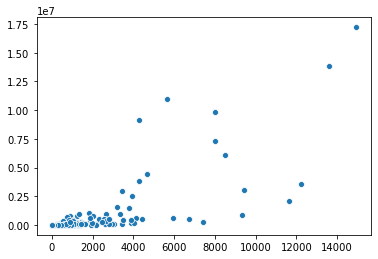

In [60]:
sns.scatterplot(cpmCount.mean(1), cpmCount.var(1)) 

In [17]:
Sample_cond

dex celltype      geo_id
id                                      
SRR1039508  control   N61311  GSM1275862
SRR1039512  control  N052611  GSM1275866
SRR1039516  control  N080611  GSM1275870
SRR1039520  control  N061011  GSM1275874
SRR1039509  treated   N61311  GSM1275863
SRR1039513  treated  N052611  GSM1275867
SRR1039517  treated  N080611  GSM1275871
SRR1039521  treated  N061011  GSM1275875

In [18]:
llCond = Sample_cond.loc[:,['dex','celltype']]
llCond

dex celltype
id                          
SRR1039508  control   N61311
SRR1039512  control  N052611
SRR1039516  control  N080611
SRR1039520  control  N061011
SRR1039509  treated   N61311
SRR1039513  treated  N052611
SRR1039517  treated  N080611
SRR1039521  treated  N061011

In [19]:
lldx = patsy.dmatrix('dex + celltype' , data = llCond).view()

In [20]:
lldx

array([[1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0.],
       [1., 1., 1., 0., 0.]])

In [21]:
c = Sample_cond['dex'].to_list()

In [22]:
c

['control',
 'control',
 'control',
 'control',
 'treated',
 'treated',
 'treated',
 'treated']

In [23]:
#matx = patsy.dmatrix('conds')
matx = patsy.dmatrix('c').view()

In [21]:
#matr = matx.view()
#matr

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [16]:
#matr = np.array(matr)

In [24]:
matx

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [25]:
cpmCount.iloc[0].values

array([32.08157226, 34.90422956, 45.24584493, 39.49172743, 24.45474599,
       30.02592373, 36.01016071, 28.90630015])

In [26]:
dmod, cmod = sm.OLS(cpmCount.iloc[0].values, matx).fit(), sm.OLS(cpmCount.iloc[0].values, lldx).fit()

In [27]:
dmod.f_pvalue, cmod.f_pvalue

(0.07362691382241603, 0.012961898219150532)

In [28]:
dmod.llf, cmod.llf

(-23.512844713645624, -11.837938691688239)

In [36]:
dmod.resid

array([-5.84927128, -3.02661398,  7.31500138,  1.56088389, -5.39453666,
        0.17664109,  6.16087806, -0.94298249])

In [39]:
L, P = lrtest(dmod.llf, cmod.llf)
L, P

(23.34981204391477, 1.3505670670509652e-06)

In [42]:
print('p: %.8f' % P)

p: 0.00000135


In [46]:
print('p : % .8f' % cmod.compare_lr_test(dmod, False)[1])

p :  0.00003414


In [55]:
r = np.zeros_like(results.params)
r

array([0., 0.])

In [62]:
r[:2] = [1,-1]
r

array([ 1., -1.])

In [72]:
results.f_test(r).pvalue

array(0.78404904)

In [23]:
def OLS_fit(arr, design_matrix):
    model = sm.OLS(arr, design_matrix).fit()
    return model.fvalue, model.f_pvalue

In [24]:
cpmCount.values.shape

(25258, 8)

In [25]:
arglist = [(val, matr) for val in cpmCount.values]
with Pool() as proc:
    sms_TtestMul = proc.starmap(OLS_fit, arglist)

In [26]:
sms_Ttest = pd.DataFrame(sms_TtestMul, columns= ['fval', 'pval'], index = cpmCount.index)
sms_Ttest

fval      pval
ensgene                             
ENSG00000000003   4.684696  0.073627
ENSG00000000419  15.171470  0.008030
ENSG00000000457   0.082350  0.783791
ENSG00000000460   0.439564  0.531962
ENSG00000000938   2.452673  0.168365
...                    ...       ...
ENSG00000283100   0.400270  0.550285
ENSG00000283101   1.519260  0.263835
ENSG00000283104   2.501094  0.164852
ENSG00000283111   0.013281  0.912014
ENSG00000283120   0.602358  0.467161

[25258 rows x 2 columns]

In [27]:
nrm_ttest = ttest(cpmCount, c)
nrm_ttest

T-statistic      Pval
ensgene                               
ENSG00000000003     2.164416  0.073627
ENSG00000000419    -3.895057  0.008030
ENSG00000000457    -0.286966  0.783791
ENSG00000000460     0.662996  0.531962
ENSG00000000938     1.566101  0.168365
...                      ...       ...
ENSG00000283100     0.632669  0.550285
ENSG00000283101    -1.232583  0.263835
ENSG00000283104     1.581485  0.164852
ENSG00000283111     0.115241  0.912014
ENSG00000283120     0.776118  0.467161

[25258 rows x 2 columns]

In [32]:
mod_ttest = Moderate_ttest(cpmCount, c)
mod_ttest

T-statistic      Pval
ensgene                               
ENSG00000000003     3.827698  0.008682
ENSG00000000419    -5.032729  0.002374
ENSG00000000457    -0.394566  0.706806
ENSG00000000460     0.707536  0.505773
ENSG00000000938     0.114273  0.912749
...                      ...       ...
ENSG00000283100     0.978497  0.365617
ENSG00000283101    -0.497354  0.636637
ENSG00000283104     1.367382  0.220513
ENSG00000283111     0.005828  0.995539
ENSG00000283120     0.083416  0.936234

[25258 rows x 2 columns]

In [53]:
c

['control',
 'control',
 'control',
 'control',
 'treated',
 'treated',
 'treated',
 'treated']

In [56]:
cntrl, treat = np.where(np.array(c) == 'control'), np.where(np.array(c) == 'treated')

In [72]:
cntrl_total, treat_total = cpmCount.loc[:, 'control'].values.sum(), cpmCount.loc[:, 'treated'].values.sum()

In [68]:
cpmCount.loc['ENSG00000000003', 'control'].sum()

151.72337418953808

In [74]:
stats.fisher_exact([
                    [cpmCount.loc['ENSG00000000003', 'control'].sum() ,cntrl_total - cpmCount.loc['ENSG00000000003', 'control'].sum()],
                    [cpmCount.loc['ENSG00000000003', 'treated'].sum() ,treat_total - cpmCount.loc['ENSG00000000003', 'treated'].sum()]    
                     ])

(1.3490667978697142, 0.014826557568229298)

In [78]:
cpmCount.loc[:, 'control'].sum(1)

ensgene
ENSG00000000003    151.723374
ENSG00000000419     87.445152
ENSG00000000457     57.918396
ENSG00000000460     16.639356
ENSG00000000938      0.115954
                      ...    
ENSG00000283100    107.167802
ENSG00000283101      0.978283
ENSG00000283104     15.418905
ENSG00000283111      0.038672
ENSG00000283120      0.219650
Length: 25258, dtype: float64

In [143]:
def Fisher_exacttest(count, condition):
    cond = np.unique(condition)
    countd = pd.DataFrame()
    countd[cond[0]], countd[cond[1]] = count.loc[:, cond[0]].sum(1) ,count.loc[:, cond[1]].sum(1)
    return pd.DataFrame([stats.fisher_exact(i.reshape(2,2).T) for i in \
        pd.concat([countd, countd.sum() - countd], axis = 1).values], index = count.index,\
            columns = ['odd-ratio', 'pval'])

In [144]:
fish_test = Fisher_exacttest(cpmCount, c)

In [145]:
fish_test

odd-ratio      pval
ensgene                             
ENSG00000000003   1.349067  0.014827
ENSG00000000419   0.915790  0.560149
ENSG00000000457   1.027122  0.926098
ENSG00000000460   1.134039  0.857780
ENSG00000000938        NaN  1.000000
...                    ...       ...
ENSG00000283100   1.115280  0.446945
ENSG00000283101   0.000000  1.000000
ENSG00000283104   1.226725  0.706144
ENSG00000283111        NaN  1.000000
ENSG00000283120        NaN  1.000000

[25258 rows x 2 columns]

In [19]:
def hist(data, height = 600, width = 800, bins = 15, color = None, linecolor = 'black', linewidth = 1.5, alpha = None, xlabel = None, ylabel = 'Frequency', title = ''):
    his = hv.Histogram(np.histogram(data, bins = bins)).opts(color = color, line_color = linecolor, line_width = linewidth, alpha = alpha, height = height, width = width, title = title)
    return his.redim(x = xlabel, Frequency = ylabel)

In [148]:
#hist(fish_test['pval'])

:Histogram   [x]   (Frequency)

In [29]:
hist(sms_Ttest['pval'])

:Histogram   [x]   (Frequency)

In [30]:
hist(nrm_ttest['Pval'])

:Histogram   [x]   (Frequency)

In [31]:
hist(mod_ttest['Pval'])

NameError: name 'mod_ttest' is not defined

In [85]:
from statsmodels.formula.api import ols
formula = 'TOTEMP ~ GNPDEFL + GNP + UNEMP + ARMED + POP + YEAR'
results = ols(formula, dataDL).fit()
hypotheses = 'POP = YEAR'
t_test = results.t_test(hypotheses)

In [86]:
t_test

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0         -1829.2026    455.391     -4.017      0.003   -2859.368    -799.037

In [91]:
geneN = pd.DataFrame()

In [100]:
geneN['WT'],geneN['MT'] = cpmCount.values[0,:3],cpmCount.values[0,3:]


WT         MT
0  19.613188  17.230661
1  39.249924  18.132849
2  39.284154  18.269289

In [96]:
cpmCount

Cond WT Rep 1  Cond WT Rep 2  Cond WT Rep 3  \
geneID                                                            
Solyc00g005050.2.1      19.613188      39.249924      39.284154   
Solyc00g005080.1.1       0.000000       0.000000       0.000000   
Solyc00g005150.1.1       0.000000       0.000000       0.000000   
Solyc00g005840.2.1      27.048253      30.805717      17.543564   
Solyc00g005860.1.1       0.000000       0.078187       0.000000   
...                           ...            ...            ...   
Solyc12g100310.1.1      18.331280      13.135433      11.415908   
Solyc12g100320.1.1      19.805474      26.349053      32.233152   
Solyc12g100330.1.1      22.561576      12.119000       3.105798   
Solyc12g100350.1.1       0.256382       0.000000       0.000000   
Solyc12g100360.1.1      64.351767      20.406833       8.729812   

                    Cond Mt Rep 1  Cond Mt Rep 2  Cond Mt Rep 3  
geneID                                                           
Solyc00g005050.2.1      17.230661      18.132849      18.269289  
Solyc00g005080.1.1       0.000000       0.099087       0.000000  
Solyc00g005150.1.1       0.093391       0.000000       0.062140  
Solyc00g005840.2.1      20.546046      22.443116      23.054103  
Solyc00g005860.1.1       0.140087       0.000000       0.000000  
...                           ...            ...            ...  
Solyc12g100310.1.1      18.584832      20.560471      20.444205  
Solyc12g100320.1.1      13.775190      13.228062      14.043739  
Solyc12g100330.1.1      34.274540      37.553824      36.103595  
Solyc12g100350.1.1       0.140087       0.495433       0.310702  
Solyc12g100360.1.1      74.619502      73.621348      79.166920  

[27183 rows x 6 columns]

In [94]:
hv.Scatter((np.log2(cpmCount.mean(1) + 0.5), np.sqrt(np.log2(cpmCount.std(1) + 1)))).opts(line_color = 'white', width = 600, height = 400) 
#    hv.Curve((np.log2(cpmCount.mean(1) + 0.5), shrink_dis)).opts(line_color = 'red', line_width = 1)


:Scatter   [x]   (y)

In [84]:
shrink_dis = ( np.sqrt(np.log2(cpmCount.std(1) + 1)) + np.sqrt(np.log2(cpmCount.std(1) + 1)).median() )/ 2
shrink_dis

geneID
Solyc00g005050.2.1    2.557117
Solyc00g005080.1.1    0.907763
Solyc00g005150.1.1    0.910368
Solyc00g005840.2.1    2.254872
Solyc00g005860.1.1    0.957716
                        ...   
Solyc12g100310.1.1    2.179888
Solyc12g100320.1.1    2.443300
Solyc12g100330.1.1    2.651144
Solyc12g100350.1.1    1.173185
Solyc12g100360.1.1    2.902085
Length: 27183, dtype: float64

In [73]:
#cpmCount = cpmCount[(cpmCount != 0).all(1)]
#cpmCount

Cond WT Rep 1  Cond WT Rep 2  Cond WT Rep 3  \
geneID                                                            
Solyc00g005050.2.1      19.613188      39.249924      39.284154   
Solyc00g005840.2.1      27.048253      30.805717      17.543564   
Solyc00g006470.1.1       1.153717       3.518419       5.624013   
Solyc00g006490.2.1      34.162841      26.974549      36.514117   
Solyc00g006690.2.1       0.833240       2.736548       8.477990   
...                           ...            ...            ...   
Solyc12g100290.1.1       2.563815       1.641929       3.273679   
Solyc12g100310.1.1      18.331280      13.135433      11.415908   
Solyc12g100320.1.1      19.805474      26.349053      32.233152   
Solyc12g100330.1.1      22.561576      12.119000       3.105798   
Solyc12g100360.1.1      64.351767      20.406833       8.729812   

                    Cond Mt Rep 1  Cond Mt Rep 2  Cond Mt Rep 3  
geneID                                                           
Solyc00g005050.2.1      17.230661      18.132849      18.269289  
Solyc00g005840.2.1      20.546046      22.443116      23.054103  
Solyc00g006470.1.1       0.700433       1.288126       0.994247  
Solyc00g006490.2.1      28.857855      30.518675      32.748012  
Solyc00g006690.2.1       0.607042       1.189039       1.491371  
...                           ...            ...            ...  
Solyc12g100290.1.1       2.848429       3.517575       2.920601  
Solyc12g100310.1.1      18.584832      20.560471      20.444205  
Solyc12g100320.1.1      13.775190      13.228062      14.043739  
Solyc12g100330.1.1      34.274540      37.553824      36.103595  
Solyc12g100360.1.1      74.619502      73.621348      79.166920  

[22067 rows x 6 columns]

In [87]:
hist(np.log(cpmCount.var(1) + 1))

:Histogram   [x]   (Frequency)

In [88]:
hv.Distribution(np.array([np.random.choice(np.log(cpmCount.var(1) + 1),22, False).mean() for _ in range(100)]))

:Distribution   [Value]   (Density)

In [89]:
hv.Distribution(np.array([np.random.choice(np.log(cpmCount.var(1) + 1), 22, False).var() for _ in range(100)]))

:Distribution   [Value]   (Density)

In [100]:
indi_std = np.log2(cpmCount.std(1) + 1)
med_std = indi_var.median()
indi_std, med_std

(geneID
 Solyc00g005050.2.1    3.566588
 Solyc00g005080.1.1    0.057210
 Solyc00g005150.1.1    0.058464
 Solyc00g005840.2.1    2.516336
 Solyc00g005860.1.1    0.083602
                         ...   
 Solyc12g100310.1.1    2.284066
 Solyc12g100320.1.1    3.149647
 Solyc12g100330.1.1    3.930578
 Solyc12g100350.1.1    0.254630
 Solyc12g100360.1.1    4.988562
 Length: 27183, dtype: float64,
 2.811196794514645)

In [115]:
#np.random.seed = 100

In [116]:
#gset = np.random.normal(200, 70, 3000)

In [170]:
gset = pd.read_csv('simulatedMatrix.txt', sep = ' ', index_col = 0)
gset

V1          V2          V3          V4          V5          V6
1    164.846535   98.759878  276.835510  119.318037  294.420400  251.731156
2    209.207182  222.109903  282.672555  232.491249  183.917977   49.491506
3    194.475804  176.007674  241.125748  251.025273   78.726065  257.524944
4    262.074937   64.805283  275.332080  228.743222  156.088368  315.762768
5    208.187989  216.997470  279.565703   97.719696  183.164451  159.238315
..          ...         ...         ...         ...         ...         ...
496   80.222088  152.354245  117.043591  175.799720  173.942707  227.185468
497  202.804063  128.972614  272.710971  204.422976  130.842094  225.551389
498  160.719956  363.563068  102.143948  235.800878  198.936993  137.071411
499   20.984656  117.998498  214.059540  208.215475  246.451539  160.527335
500  151.225483   50.100064  157.881277  110.144133  144.570962  150.300775

[500 rows x 6 columns]

In [171]:
gset.columns = ['WT', 'WT', 'WT', 'MT', 'MT', 'MT']
gset

WT          WT          WT          MT          MT          MT
1    164.846535   98.759878  276.835510  119.318037  294.420400  251.731156
2    209.207182  222.109903  282.672555  232.491249  183.917977   49.491506
3    194.475804  176.007674  241.125748  251.025273   78.726065  257.524944
4    262.074937   64.805283  275.332080  228.743222  156.088368  315.762768
5    208.187989  216.997470  279.565703   97.719696  183.164451  159.238315
..          ...         ...         ...         ...         ...         ...
496   80.222088  152.354245  117.043591  175.799720  173.942707  227.185468
497  202.804063  128.972614  272.710971  204.422976  130.842094  225.551389
498  160.719956  363.563068  102.143948  235.800878  198.936993  137.071411
499   20.984656  117.998498  214.059540  208.215475  246.451539  160.527335
500  151.225483   50.100064  157.881277  110.144133  144.570962  150.300775

[500 rows x 6 columns]

In [132]:
group1 = [0,1,2]
group2 = [3,4,5]

In [133]:
gset.iloc[:,group1], gset.iloc[:,group2]

(             V1          V2          V3
 1    164.846535   98.759878  276.835510
 2    209.207182  222.109903  282.672555
 3    194.475804  176.007674  241.125748
 4    262.074937   64.805283  275.332080
 5    208.187989  216.997470  279.565703
 ..          ...         ...         ...
 496   80.222088  152.354245  117.043591
 497  202.804063  128.972614  272.710971
 498  160.719956  363.563068  102.143948
 499   20.984656  117.998498  214.059540
 500  151.225483   50.100064  157.881277
 
 [500 rows x 3 columns],
              V4          V5          V6
 1    119.318037  294.420400  251.731156
 2    232.491249  183.917977   49.491506
 3    251.025273   78.726065  257.524944
 4    228.743222  156.088368  315.762768
 5     97.719696  183.164451  159.238315
 ..          ...         ...         ...
 496  175.799720  173.942707  227.185468
 497  204.422976  130.842094  225.551389
 498  235.800878  198.936993  137.071411
 499  208.215475  246.451539  160.527335
 500  110.144133  144.570962  

In [229]:
len(gset.columns[gset.columns == 'WT'])

3

In [20]:
def Moderate_ttest(dataframe, conditions):
    dataframe.columns = conditions
    conds = dataframe.columns.unique()
    n1 = len(dataframe.columns[dataframe.columns == conds[0]])
    n2 = len(dataframe.columns[dataframe.columns == conds[1]])
    dx = dataframe[conds[0]].mean(1) - dataframe[conds[1]].mean(1)
    stderr =  np.sqrt( (dataframe[conds[0]].var(1) * (n1 - 1) + dataframe[conds[1]].var(1) * (n2 - 1)) / (n1 + n2 - 2) * (1/n1 + 1/n2) )
    mod_stderr = (stderr + np.median(stderr))/2
    t_mod = dx / mod_stderr
    p_mod = stats.t.sf(np.abs(t_mod), n1 + n2 - 2)*2
    td = pd.DataFrame()
    td['T-statistic'] = t_mod
    td['Pval'] = p_mod
    return td

In [21]:
def ttest(dataframe, conditions):
    dataframe.columns = conditions
    conds = dataframe.columns.unique()
    n1 = len(dataframe.columns[dataframe.columns == conds[0]])
    n2 = len(dataframe.columns[dataframe.columns == conds[1]])
    dx = dataframe[conds[0]].mean(1) - dataframe[conds[1]].mean(1)
    stderr =  np.sqrt( (dataframe[conds[0]].var(1) * (n1 - 1) + dataframe[conds[1]].var(1) * (n2 - 1)) / (n1 + n2 - 2) * (1/n1 + 1/n2) )
    #mod_stderr = (stderr + np.median(stderr))/2
    t = dx / stderr
    p = stats.t.sf(np.abs(t), n1 + n2 - 2)*2
    td = pd.DataFrame()
    td['T-statistic'] = t
    td['Pval'] = p
    return td

In [240]:
gset[co[0]].mean()

WT    197.367482
WT    204.985231
WT    199.202552
dtype: float64

In [213]:
gset.iloc[:, [3,4,5]]

MT          MT          MT
1    119.318037  294.420400  251.731156
2    232.491249  183.917977   49.491506
3    251.025273   78.726065  257.524944
4    228.743222  156.088368  315.762768
5     97.719696  183.164451  159.238315
..          ...         ...         ...
496  175.799720  173.942707  227.185468
497  204.422976  130.842094  225.551389
498  235.800878  198.936993  137.071411
499  208.215475  246.451539  160.527335
500  110.144133  144.570962  150.300775

[500 rows x 3 columns]

In [134]:
n1,n2 = 3,3

In [135]:
dx = gset.iloc[:,group1].mean(1) - gset.iloc[:,group2].mean(1)

In [136]:
dx

1     -41.675890
2      82.696302
3       8.110981
4     -32.794019
5      88.209567
         ...    
496   -75.769324
497    14.557063
498    18.205897
499   -87.383885
500   -15.269682
Length: 500, dtype: float64

In [138]:
stderr =  np.sqrt( (gset.iloc[:,group1].var(1) * (n1 - 1) + gset.iloc[:,group2].var(1) * (n2 - 1)) / (n1 + n2 - 2) * (1/n1 + 1/n2) )
stderr

1      74.025653
2      59.231289
3      61.669349
4      82.246122
5      33.948470
         ...    
496    27.166614
497    50.458553
498    84.278057
499    61.026608
500    37.057038
Length: 500, dtype: float64

In [140]:
mod_stderr = (stderr + np.median(stderr))/2
mod_stderr

1      63.771545
2      56.374363
3      57.593393
4      67.881780
5      43.732954
         ...    
496    40.342026
497    51.987995
498    68.897747
499    57.272023
500    45.287238
Length: 500, dtype: float64

In [141]:
t_mod = dx / mod_stderr
t_mod

1     -0.653519
2      1.466913
3      0.140832
4     -0.483105
5      2.017005
         ...   
496   -1.878174
497    0.280008
498    0.264245
499   -1.525769
500   -0.337174
Length: 500, dtype: float64

In [143]:
t = dx / stderr
t

1     -0.562993
2      1.396159
3      0.131524
4     -0.398730
5      2.598337
         ...   
496   -2.789060
497    0.288495
498    0.216022
499   -1.431898
500   -0.412059
Length: 500, dtype: float64

In [259]:
Moderate_ttest(gset, ['WT', 'WT', 'WT', 'MT', 'MT', 'MT'])

T-statistic      Pval
1      -0.653519  0.549085
2       1.466913  0.216295
3       0.140832  0.894810
4      -0.483105  0.654273
5       2.017005  0.113886
..           ...       ...
496    -1.878174  0.133563
497     0.280008  0.793355
498     0.264245  0.804647
499    -1.525769  0.201764
500    -0.337174  0.752935

[500 rows x 2 columns]

In [257]:
p_mod = stats.t.sf(np.abs(t_mod), n1 + n2 - 2)*2

In [260]:
p_mod[:5]

array([0.5490846 , 0.21629462, 0.89481033, 0.65427302, 0.11388581])

In [263]:
ttest(gset, ['WT', 'WT', 'WT', 'MT', 'MT', 'MT'])

T-statistic      Pval
1      -0.562993  0.603500
2       1.396159  0.235166
3       0.131524  0.901711
4      -0.398730  0.710461
5       2.598337  0.060153
..           ...       ...
496    -2.789060  0.049359
497     0.288495  0.787300
498     0.216022  0.839540
499    -1.431898  0.225436
500    -0.412059  0.701422

[500 rows x 2 columns]

In [262]:
p = stats.t.sf(np.abs(t), n1+n2 - 2)*2


In [264]:
p[:5]

array([0.60349956, 0.23516602, 0.90171111, 0.71046087, 0.06015333])

In [165]:
(hist(p).opts(width = 500, height = 500).redim.label(x = 'Pval') + hist(p_mod).opts(width = 500, height = 500).redim.label(x = 'Mod-Pval')).\
    relabel('T-test vs Moderated T-test')

:Layout
   .Histogram.I  :Histogram   [x]   (Frequency)
   .Histogram.II :Histogram   [x]   (Frequency)

In [33]:
cpmCount

id               SRR1039508  SRR1039512  SRR1039516  SRR1039520  SRR1039509  \
ensgene                                                                       
ENSG00000000003   32.081572   34.904230   45.245845   39.491727   24.454746   
ENSG00000000419   20.722122   23.784298   22.506907   20.431824   26.316527   
ENSG00000000457   15.397380   14.054358   12.297589   16.169070   12.982149   
ENSG00000000460    4.259794    2.818594    4.563256    4.997712    4.075791   
ENSG00000000938    0.000000    0.038611    0.077343    0.000000    0.000000   
...                     ...         ...         ...         ...         ...   
ENSG00000283100   28.709235   24.904013   26.606104   26.948449   28.681492   
ENSG00000283101    0.133119    0.347498    0.154687    0.342980    0.150955   
ENSG00000283104    3.150473    4.478861    3.673808    4.115763    3.522289   
ENSG00000283111    0.000000    0.000000    0.038672    0.000000    0.000000   
ENSG00000283120    0.044373    0.038611    0.038672    0.097994    0.100637   

id               SRR1039513  SRR1039517  SRR1039521  
ensgene                                              
ENSG00000000003   30.025924   36.010161   28.906300  
ENSG00000000419   25.032849   25.637134   24.359779  
ENSG00000000457   15.991335   14.673238   15.506029  
ENSG00000000460    4.453283    3.085647    3.541500  
ENSG00000000938    0.000000    0.000000    0.000000  
...                     ...         ...         ...  
ENSG00000283100   24.897901   21.993444   27.374841  
ENSG00000283101    0.674740    0.426738    0.335007  
ENSG00000283104    3.036329    2.724561    3.780791  
ENSG00000283111    0.000000    0.032826    0.000000  
ENSG00000283120    0.000000    0.032826    0.000000  

[25258 rows x 8 columns]

In [83]:
Md_Test = Moderate_ttest(cpmCount, Sample_cond['dex'])
Md_Test

T-statistic      Pval
ensgene                               
ENSG00000000003    -3.074869  0.021806
ENSG00000000419     0.674516  0.525106
ENSG00000000457    -0.069065  0.947182
ENSG00000000460    -0.265948  0.799182
ENSG00000000938    -0.036068  0.972398
...                      ...       ...
ENSG00000283100     0.978594  0.365573
ENSG00000283101     0.035880  0.972542
ENSG00000283104    -0.055812  0.957303
ENSG00000283111    -0.068000  0.947995
ENSG00000283120     0.012976  0.990068

[25258 rows x 2 columns]

In [16]:
sci_data = ttest(cpmCount, Sample_cond['dex'])
sci_data

T-statistic      Pval
ensgene                               
ENSG00000000003    -1.732186  0.133950
ENSG00000000419     0.442636  0.673540
ENSG00000000457    -0.050972  0.961002
ENSG00000000460    -0.251872  0.809546
ENSG00000000938    -0.448057  0.669836
...                      ...       ...
ENSG00000283100     0.640623  0.545441
ENSG00000283101     0.084821  0.935163
ENSG00000283104    -0.060370  0.953821
ENSG00000283111    -1.720587  0.136114
ENSG00000283120     0.121434  0.907312

[25258 rows x 2 columns]

In [17]:
(hist(sci_data['Pval']).opts(width= 400, height = 400, title = 'Normal T-test').redim.label(x = 'Pval') + \
    hist(Md_Test['Pval']).opts(width= 400, height = 400, title = 'Moderate T-test').redim.label(x = 'Pval')).relabel("T-test vs Moderated T-test")

:Layout
   .Histogram.I  :Histogram   [x]   (Frequency)
   .Histogram.II :Histogram   [x]   (Frequency)

In [27]:
#Md_Test.to_csv('/media/hps2/Raghu/Sig_genes.csv')

In [42]:
sci_data[sci_data['Pval'] < 0.05]

T-statistic      Pval
ensgene                               
ENSG00000000419    -3.895057  0.008030
ENSG00000002834    -4.484228  0.004174
ENSG00000002919    -3.309136  0.016222
ENSG00000003096     5.653613  0.001315
ENSG00000003402    -9.155588  0.000096
...                      ...       ...
ENSG00000283009     2.664605  0.037294
ENSG00000283034     3.466290  0.013364
ENSG00000283059     3.843398  0.008525
ENSG00000283085     2.676711  0.036697
ENSG00000283094     4.679566  0.003397

[3755 rows x 2 columns]

In [43]:
Md_Test[Md_Test['Pval'] < 0.05]

T-statistic      Pval
ensgene                               
ENSG00000000003     3.827698  0.008682
ENSG00000000419    -5.032729  0.002374
ENSG00000000971    -3.620247  0.011094
ENSG00000001036     4.052630  0.006706
ENSG00000001167     3.834549  0.008613
...                      ...       ...
ENSG00000283024    -2.830497  0.029938
ENSG00000283034     4.949937  0.002578
ENSG00000283059     2.828329  0.030024
ENSG00000283085     4.807600  0.002978
ENSG00000283094     8.390549  0.000156

[5387 rows x 2 columns]

In [84]:
_, Md_Test['Adj.Pval'] = sms.stats.multitest.fdrcorrection(Md_Test['Pval'].values, alpha=0.05, method='indep', is_sorted=False)

In [85]:
Md_Test = Md_Test.sort_values(by = 'Adj.Pval')

In [86]:
Md_Test.shape

(25258, 3)

In [30]:
Md_Test[Md_Test['Adj.Pval'] <= 0.05].index

Index(['ENSG00000213722', 'ENSG00000206427', 'ENSG00000225164',
       'ENSG00000231825', 'ENSG00000231370', 'ENSG00000237724',
       'ENSG00000235439', 'ENSG00000204389', 'ENSG00000197728',
       'ENSG00000225073', 'ENSG00000196656', 'ENSG00000096155',
       'ENSG00000206406', 'ENSG00000224774', 'ENSG00000215077',
       'ENSG00000204388', 'ENSG00000230475', 'ENSG00000197969',
       'ENSG00000281994', 'ENSG00000254681', 'ENSG00000105472',
       'ENSG00000133112', 'ENSG00000101846', 'ENSG00000166233',
       'ENSG00000006652', 'ENSG00000233348', 'ENSG00000212866',
       'ENSG00000229524', 'ENSG00000275498', 'ENSG00000116984',
       'ENSG00000206408', 'ENSG00000228605', 'ENSG00000151693',
       'ENSG00000206403', 'ENSG00000164176', 'ENSG00000170381',
       'ENSG00000233210', 'ENSG00000281965', 'ENSG00000183458',
       'ENSG00000234651', 'ENSG00000186522', 'ENSG00000282243',
       'ENSG00000144674', 'ENSG00000149084', 'ENSG00000144749',
       'ENSG00000052802', 'ENSG000000906

In [20]:
(hist(Md_Test['Pval']).opts(width= 400, height = 400, title = 'Moderate T-test').redim.label(x = 'Pval') + \
    hist(Md_Test['Adj.Pval']).opts(width= 400, height = 400, title = 'Adjusted Moderate T-test').redim.label(x = 'Pval')).relabel("T-test vs Moderated T-test")

:Layout
   .Histogram.I  :Histogram   [x]   (Frequency)
   .Histogram.II :Histogram   [x]   (Frequency)

In [87]:
sign_genes = cpmCount.loc[Md_Test.index[:1000], :]

In [89]:
sign_genes.shape

(1000, 8)

In [90]:
queries = sign_genes.index.to_list()
queries[:5],len(queries)

(['ENSG00000213722',
  'ENSG00000206427',
  'ENSG00000225164',
  'ENSG00000231825',
  'ENSG00000231370'],
 1000)

In [7]:
queries = ['ENSG00000213722',
  'ENSG00000206427',
  'ENSG00000225164',
  'ENSG00000231825',
  'ENSG00000231370',
  'ENSG00000125285',
  'ENSG00000182968']

In [8]:
from pypathway import GSEA
import gseapy
from gseapy.parser import Biomart
from bioservices.kegg import KEGG
import bioservices
from pybiomart import Server

In [15]:
bm = Biomart()
## view validated marts
marts = bm.get_marts()
## view validated dataset
datasets = bm.get_datasets(mart='ENSEMBL_MART_ENSEMBL')
## view validated attributes
attrs = bm.get_attributes(dataset='hsapiens_gene_ensembl')
## view validated filters
filters = bm.get_filters(dataset='hsapiens_gene_ensembl')
## query results
#queries = ['ENSG00000125285','ENSG00000182968'] # need to be a python list

In [16]:
results = bm.query(dataset='hsapiens_gene_ensembl',
                       attributes=['ensembl_gene_id', 'external_gene_name', 'entrezgene_id', 'go_id'],
                       filters={'ensembl_gene_id': queries})

In [17]:
results

ensembl_gene_id external_gene_name  entrezgene_id       go_id
0    ENSG00000125285              SOX21          11166  GO:0006355
1    ENSG00000125285              SOX21          11166  GO:0005634
2    ENSG00000125285              SOX21          11166  GO:0003677
3    ENSG00000125285              SOX21          11166  GO:0003677
4    ENSG00000125285              SOX21          11166  GO:0003700
..               ...                ...            ...         ...
283  ENSG00000231825             PRRC2A           7916         NaN
284  ENSG00000231825             PRRC2A           7916         NaN
285  ENSG00000231825             PRRC2A           7916         NaN
286  ENSG00000231825             PRRC2A           7916         NaN
287  ENSG00000231825             PRRC2A           7916         NaN

[288 rows x 4 columns]

In [14]:
results['ensembl_gene_id'].unique()

array(['ENSG00000125285', 'ENSG00000182968', 'ENSG00000206427',
       'ENSG00000213722', 'ENSG00000225164', 'ENSG00000231370',
       'ENSG00000231825'], dtype=object)

In [96]:
gene_exp = pd.concat([sign_genes,results.loc[:,['ensembl_gene_id', 'external_gene_name']].\
    drop_duplicates('ensembl_gene_id').set_index('ensembl_gene_id')], axis = 1).dropna().set_index('external_gene_name')

In [97]:
gene_exp.shape

(999, 8)

In [98]:
phenoA, phenoB, class_vector = GSEA.parse_class_vector("airway.cls")

In [99]:
phenoA

'control'

In [100]:
phenoB

'treated'

In [70]:
class_vector

['Co', 'Co', 'Co', 'Co', 'tre', 'tre', 'tre', 'tre']

In [101]:
gene_exp.shape

(999, 8)

In [102]:
r = GSEA.run(gene_exp.reset_index().drop_duplicates('external_gene_name') ,gmt="KEGG_2016", cls=class_vector)

In [109]:
r.table.sort_values("es")

es       nes  \
Term                                                                     
HTLV-I infection Homo sapiens hsa05166             -0.305367 -0.949344   
Viral carcinogenesis Homo sapiens hsa05203         -0.269804 -0.966649   
Endocytosis Homo sapiens hsa04144                  -0.230710 -0.647713   
Rap1 signaling pathway Homo sapiens hsa04015       -0.141379 -0.361909   
PI3K-Akt signaling pathway Homo sapiens hsa04151   -0.134655 -0.453878   
Pathways in cancer Homo sapiens hsa05200           -0.108209 -0.311721   
Proteoglycans in cancer Homo sapiens hsa05205       0.178442  0.647643   
MAPK signaling pathway Homo sapiens hsa04010        0.185657  0.580442   
Protein processing in endoplasmic reticulum Hom...  0.267149  0.913482   
Metabolic pathways Homo sapiens hsa01100            0.273573  0.843751   
Epstein-Barr virus infection Homo sapiens hsa05169  0.302446  1.005235   
Non-alcoholic fatty liver disease (NAFLD) Homo ...  0.362610  0.919736   
Huntington's disease Homo sapiens hsa05016          0.386977  0.926073   
Ribosome Homo sapiens hsa03010                      0.573236  0.923507   

                                                        pval       fdr  \
Term                                                                     
HTLV-I infection Homo sapiens hsa05166              0.500000  1.000000   
Viral carcinogenesis Homo sapiens hsa05203          0.444444  1.000000   
Endocytosis Homo sapiens hsa04144                   0.846154  1.000000   
Rap1 signaling pathway Homo sapiens hsa04015        1.000000  1.000000   
PI3K-Akt signaling pathway Homo sapiens hsa04151    1.000000  1.000000   
Pathways in cancer Homo sapiens hsa05200            1.000000  0.992701   
Proteoglycans in cancer Homo sapiens hsa05205       0.900000  1.000000   
MAPK signaling pathway Homo sapiens hsa04010        0.900000  0.958042   
Protein processing in endoplasmic reticulum Hom...  0.500000  0.995804   
Metabolic pathways Homo sapiens hsa01100            0.800000  0.951049   
Epstein-Barr virus infection Homo sapiens hsa05169  0.461538  1.000000   
Non-alcoholic fatty liver disease (NAFLD) Homo ...  0.615385  1.000000   
Huntington's disease Homo sapiens hsa05016          0.666667  1.000000   
Ribosome Homo sapiens hsa03010                      0.818182  1.000000   

                                                    geneset_size  \
Term                                                               
HTLV-I infection Homo sapiens hsa05166                       258   
Viral carcinogenesis Homo sapiens hsa05203                   205   
Endocytosis Homo sapiens hsa04144                            259   
Rap1 signaling pathway Homo sapiens hsa04015                 211   
PI3K-Akt signaling pathway Homo sapiens hsa04151             341   
Pathways in cancer Homo sapiens hsa05200                     397   
Proteoglycans in cancer Homo sapiens hsa05205                203   
MAPK signaling pathway Homo sapiens hsa04010                 255   
Protein processing in endoplasmic reticulum Hom...           169   
Metabolic pathways Homo sapiens hsa01100                    1239   
Epstein-Barr virus infection Homo sapiens hsa05169           202   
Non-alcoholic fatty liver disease (NAFLD) Homo ...           151   
Huntington's disease Homo sapiens hsa05016                   193   
Ribosome Homo sapiens hsa03010                               137   

                                                    matched_size  \
Term                                                               
HTLV-I infection Homo sapiens hsa05166                        18   
Viral carcinogenesis Homo sapiens hsa05203                    17   
Endocytosis Homo sapiens hsa04144                             20   
Rap1 signaling pathway Homo sapiens hsa04015                  16   
PI3K-Akt signaling pathway Homo sapiens hsa04151              22   
Pathways in cancer Homo sapiens hsa05200                      25   
Proteoglycans in cancer Homo sapiens hsa05205          

In [108]:
r.plot()

In [112]:
phenoA, phenoB, class_vector = GSEA.parse_class_vector("GSE4107.cls")

In [114]:
phenoA, phenoB, class_vector

('patient',
 'control',
 ['patient',
  'patient',
  'patient',
  'patient',
  'patient',
  'patient',
  'patient',
  'patient',
  'patient',
  'patient',
  'patient',
  'patient',
  'control',
  'control',
  'control',
  'control',
  'control',
  'control',
  'control',
  'control',
  'control',
  'control'])

In [113]:
gene_exp = pd.read_excel("GSE4107.xlsx")

In [115]:
gene_exp.head()

Name  2965M patient's mucosa  3216M patient's mucosa  \
0      A1BG                2.738077                2.364171   
1  A1BG-AS1                1.618062                1.631023   
2      A1CF                2.029520                3.323313   
3       A2M                2.994217                2.556958   
4   A2M-AS1                2.233742                1.709143   

   3335M patientüs mucosa  3416M patient's mucosa  3578M patientüs mucosa  \
0                1.915184                2.204392                2.105189   
1                1.751713                1.942189                1.389749   
2                3.315563                2.795794                3.209412   
3                2.999796                3.354563                3.143560   
4                1.968936                2.648101                2.353158   

   3798M patientüs mucosa  3838M patientüs mucosa  3894M patientüs mucosa  \
0                2.355191                0.711476                2.097443   
1                1.620180                1.222842                1.561975   
2                2.805799                1.633054                2.807252   
3                2.776570                3.075487                2.509139   
4                2.346996                2.903206                2.467630   

   3950M patientüs mucosa  ...  NM14 healthy control  NM16 healthy control  \
0                1.496572  ...              1.773150              2.164193   
1                2.109663  ...              1.176899              1.804385   
2                3.194931  ...              3.400948              3.498237   
3                3.033883  ...              3.020295              2.995580   
4                2.119784  ...              2.288889              1.060712   

   NM18 healthy control  NM19 healthy control  NM20 healthy control  \
0              2.346402              2.042523              1.518295   
1              1.354942              1.414842              1.403163   
2              3.507465              3.405435              3.478323   
3              3.013548              2.837932              2.812989   
4              2.242833              2.235845              2.016905   

   NM22 healthy control  NM24 healthy control  NM3 healthy control  \
0              1.972372              1.078999             2.171907   
1              1.592050              1.732328             1.524912   
2              3.469412              3.511901             3.431951   
3              2.459263              2.832147             2.984786   
4              1.204287              2.312234             1.712255   

   NM4 healthy control  NM9 healthy control  
0             2.123645             1.536769  
1             1.317243             1.326480  
2             3.560375             3.516000  
3             2.824153             2.688611  
4             2.286789             2.104353  

[5 rows x 23 columns]

In [121]:
r = GSEA.run(data=gene_exp[:1000], gmt="KEGG_2016", cls=class_vector)

In [124]:
r.table.sort_values("es")

es       nes  \
Term                                                                     
Valine, leucine and isoleucine degradation Homo... -0.836409 -1.502834   
Glycerolipid metabolism Homo sapiens hsa00561      -0.674209 -1.565045   
Peroxisome Homo sapiens hsa04146                   -0.672436 -1.561172   
Fatty acid degradation Homo sapiens hsa00071       -0.659732 -1.535488   
Fatty acid metabolism Homo sapiens hsa01212        -0.631173 -1.533449   
Carbon metabolism Homo sapiens hsa01200            -0.573890 -1.400426   
Glycolysis / Gluconeogenesis Homo sapiens hsa00010 -0.541580 -1.393310   
Metabolic pathways Homo sapiens hsa01100           -0.475361 -1.410598   
PPAR signaling pathway Homo sapiens hsa03320       -0.402527 -1.150823   
ABC transporters Homo sapiens hsa02010             -0.396758 -1.240018   
Bile secretion Homo sapiens hsa04976               -0.347294 -1.019964   
Purine metabolism Homo sapiens hsa00230             0.275627  0.973451   
Adipocytokine signaling pathway Homo sapiens hs...  0.356170  1.109858   
cAMP signaling pathway Homo sapiens hsa04024        0.357156  0.930707   
Neuroactive ligand-receptor interaction Homo sa...  0.379657  1.129135   
Phospholipase D signaling pathway Homo sapiens ...  0.384434  0.963919   
Regulation of lipolysis in adipocytes Homo sapi...  0.435220  0.981159   
Rap1 signaling pathway Homo sapiens hsa04015        0.445439  1.044372   
Longevity regulating pathway - mammal Homo sapi...  0.464450  1.161159   
Oocyte meiosis Homo sapiens hsa04114                0.471356  1.188670   
Salivary secretion Homo sapiens hsa04970            0.492056  1.106824   
cGMP-PKG signaling pathway Homo sapiens hsa04022    0.508683  1.350159   
Vascular smooth muscle contraction Homo sapiens...  0.511033  1.381508   
Calcium signaling pathway Homo sapiens hsa04020     0.511079  1.256842   
HTLV-I infection Homo sapiens hsa05166              0.518818  1.234252   
Progesterone-mediated oocyte maturation Homo sa...  0.532048  1.261603   
Adrenergic signaling in cardiomyocytes Homo sap...  0.587699  1.308988   

                                                        pval       fdr  \
Term                                                                     
Valine, leucine and isoleucine degradation Homo...  0.000000  0.071795   
Glycerolipid metabolism Homo sapiens hsa00561       0.000000  0.128205   
Peroxisome Homo sapiens hsa04146                    0.000000  0.064103   
Fatty acid degradation Homo sapiens hsa00071        0.000000  0.068376   
Fatty acid metabolism Homo sapiens hsa01212         0.000000  0.051282   
Carbon metabolism Homo sapiens hsa01200             0.055556  0.117216   
Glycolysis / Gluconeogenesis Homo sapiens hsa00010  0.055556  0.105769   
Metabolic pathways Homo sapiens hsa01100            0.062500  0.119658   
PPAR signaling pathway Homo sapiens hsa03320        0.350000  0.328205   
ABC transporters Homo sapiens hsa02010              0.187500  0.239316   
Bile secretion Homo sapiens hsa04976                0.375000  0.470862   
Purine metabolism Homo sapiens hsa00230             0.500000  0.614923   
Adipocytokine signaling pathway Homo sapiens hs...  0.200000  0.533333   
cAMP signaling pathway Homo sapiens hsa04024        0.615385  0.572178   
Neuroactive ligand-receptor interaction Homo sa...  0.333333  0.564596   
Phospholipase D signaling pathway Homo sapiens ...  0.538462  0.573928   
Regulation of lipolysis in adipocytes Homo sapi...  0.500000  0.658995   
Rap1 signaling pathway Homo sapiens hsa04015        0.250000  0.570429   
Longevity regulating pathway - mammal Homo sapi...  0.307692  0.577428   
Oocyte meiosis Homo sapiens hsa04114                0.263158  0.575928   
Salivary secretion Homo sapiens hsa04970            0.285714  0.488666   
cGMP-PKG signaling pathway Homo sapiens hsa04022    0.250000  0.881890   
Vascular smooth muscle contraction Homo sapiens...  0.187500  1.000000   
Calcium signaling pathway Homo sapiens hsa04020     0.250000 

In [122]:
gseapy.gsea(data = gene_exp[:1000], gene_sets='KEGG_2016', cls= 'GSE4107.cls' , outdir='test')

In [123]:
os.listdir()

['GSE4107.xlsx',
 'Vscode_notebook.ipynb',
 'airway.cls',
 'EdgeR.ipynb',
 'EdgeR_tutorial',
 'sultan_jaccIndexes',
 'gdc_download_20210502_085221.539722.tar.gz',
 'test',
 'airway_scaledcounts.csv',
 '.vscode',
 'simulatedMatrix.txt',
 'sultan_dataset',
 'RnaSeqApp.py',
 '.ipynb_checkpoints',
 'Bactchglm.ipynb',
 'gdc_download_20210502_085221.539722',
 'assets',
 'Untitled.ipynb',
 'EdgerPy.ipynb',
 '.pybiomart.sqlite',
 'airway_metadata.csv',
 'Rnaseq_dash.py',
 'custom_plots.ipynb',
 'GSE4107.cls']

In [3]:
table = pd.DataFrame([[1,5],[0,6],[0,8],[0,8],[0,5],[7,8]], columns= ['handful', 'bag'], \
    index = ['red', 'yellow', 'orange', 'green', 'brown', 'blue'])


In [18]:
stats.fisher_exact([[23,1], [156,1]])

(0.14743589743589744, 0.24825046040517018)